# PROJECT 1
### MOVIE RECOMMENDER SYSTEM

In [3]:
pip install torch torchvision

Note: you may need to restart the kernel to use updated packages.


## Import necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import torch
import torch.nn as nn
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense


ModuleNotFoundError: No module named 'tensorflow'

## Load datasets

In [5]:

movies = pd.read_csv('movies_metadata.csv',encoding='latin1')
ratings = pd.read_csv('ratings_small.csv',encoding='latin1')


C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Inspect datasets

In [6]:

print(movies.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [7]:
print(ratings.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


In [8]:
print(movies.head())
print(movies.head())

   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497         

In [9]:
print(ratings.head())

   userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205


## Missing values

In [10]:
# Fill missing values
movies.fillna({'budget': 0, 'revenue': 0}, inplace=True)

# Drop rows with critical missing data
movies.dropna(subset=['title', 'genres'], inplace=True)

# Inspect missing data
print(movies.isnull().sum())


adult                        0
belongs_to_collection    40970
budget                       0
genres                       0
homepage                 37682
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   0
poster_path                383
production_companies         0
production_countries         0
release_date                84
revenue                      0
runtime                    257
spoken_languages             0
status                      81
tagline                  25048
title                        0
video                        0
vote_average                 0
vote_count                   0
dtype: int64


## visualization
### Ratings distribution

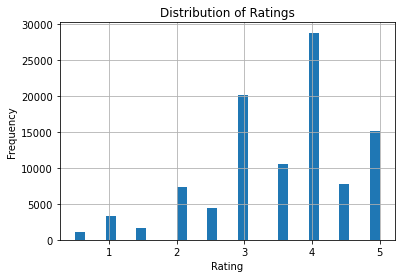

In [11]:

ratings['rating'].hist(bins=30)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


### Number of ratings per movie

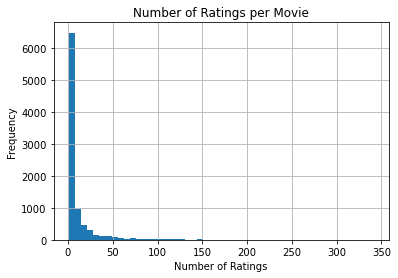

In [12]:

ratings_per_movie = ratings.groupby('movieId').count()['rating']
ratings_per_movie.hist(bins=50)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()


## Build Recommender Systems

## Content-Based Recommendation


In [13]:
# Preprocessing genres
movies['genres'] = movies['genres'].apply(lambda x: ' '.join(eval(x)))

# TF-IDF Vectorizer for genres
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['genres'])

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


TypeError: sequence item 0: expected str instance, dict found

In [14]:
# Recommend similar movies
def recommend_movies(movie_title, num_recommendations=5):
    idx = movies[movies['title'] == movie_title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:num_recommendations+1]
    movie_indices = [i[0] for i in sim_scores]
    return movies['title'].iloc[movie_indices]

print(recommend_movies('The Godfather'))

NameError: name 'cosine_sim' is not defined

## Collaborative Filtering


In [15]:
# Collaborative Filtering using scikit-learn
user_item_matrix = ratings.pivot(index='userId', columns='movieId', values='rating')
user_item_matrix.fillna(0, inplace=True)

nn = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='cosine')
nn.fit(user_item_matrix)

def recommend_users(user_id, num_recommendations=5):
    distances, indices = nn.kneighbors(user_item_matrix.iloc[user_id].values.reshape(1, -1))
    recommended_users = indices[0][1:]  # exclude the user's own profile
    return recommended_users

print(recommend_users(0))



[324 633 340 309]


In [16]:
# Collaborative Filtering using TensorFlow
num_users = ratings['userId'].nunique()
num_items = ratings['movieId'].nunique()
embedding_dim = 10

user_embeddings = tf.keras.layers.Embedding(num_users, embedding_dim)
item_embeddings = tf.keras.layers.Embedding(num_items, embedding_dim)

inputs = tf.keras.Input(shape=(1,))
user_embedding = user_embeddings(inputs)
item_embedding = item_embeddings(inputs)
x = tf.keras.layers.Concatenate()([user_embedding, item_embedding])
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


NameError: name 'tf' is not defined

In [17]:
# Collaborative Filtering using PyTorch
class Recommender(nn.Module):
    def __init__(self):
        super(Recommender, self).__init__()
        self.user_embeddings = nn.Embedding(num_users, embedding_dim)
        self.item_embeddings = nn.Embedding(num_items, embedding_dim)
        self.fc1 = nn.Linear(embedding_dim * 2, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, user_id, item_id):
        user_embedding = self.user_embeddings(user_id)
        item_embedding = self.item_embeddings(item_id)
        x = torch.cat((user_embedding, item_embedding), dim=1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = Recommender()


AttributeError: 'NearestNeighbors' object has no attribute 'Module'

## Hybrid Recommender System

In [22]:

def hybrid_recommend(user_id, movie_title):
    # Collaborative Filtering score
    cf_score = svd.predict(user_id, movies[movies['title'] == movie_title].index[0]).est

    # Content-Based score
    content_idx = movies[movies['title'] == movie_title].index[0]
    content_score = cosine_sim[content_idx].mean()

    # Combine scores
    hybrid_score = (cf_score + content_score) / 2
    return hybrid_score

print(hybrid_recommend(1, 'The Godfather'))


NameError: name 'svd' is not defined

## Predict Movie Revenue


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [20]:
# Prepare data for regression
features = movies[['budget', 'popularity', 'vote_average']].fillna(0)
target = movies['revenue']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train model
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

# Predict revenue
y_pred = regressor.predict(X_test)
print(y_pred)


[0.00000000e+00 4.99905282e+06 2.64327400e+04 ... 5.87387100e+04
 1.42908048e+06 3.16994530e+07]


### Visualization

In [23]:
# Visualize popular movies

import matplotlib.pyplot as plt

popular_movies = movies.sort_values('popularity', ascending=False).head(10)
plt.bar(popular_movies['title'], popular_movies['popularity'])
plt.xticks(rotation=45)
plt.title('Top 10 Popular Movies')
plt.show()

TypeError: '<' not supported between instances of 'float' and 'str'

## Sentiment Analysis on Movie Reviews


In [24]:
import pandas as pd
from textblob import TextBlob

# Sample data (replace with your review dataset)
reviews = pd.DataFrame({
    'movie_id': [1, 2, 1],
    'review': ["Amazing movie! Loved the story.", 
               "Terrible plot. Not worth watching.", 
               "Decent acting but predictable ending."]
})

# Function for sentiment analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Add sentiment scores
reviews['sentiment_score'] = reviews['review'].apply(analyze_sentiment)

# Filter movies with positive sentiment
positive_reviews = reviews[reviews['sentiment_score'] > 0]
print(positive_reviews)


ModuleNotFoundError: No module named 'textblob'

## Deep Learning-Based Recommendations 

In [25]:
import numpy as np
import pandas as pd
from keras.models import Model
from keras.layers import Input, Dense

# Simulate user-item matrix
user_movie_ratings = np.random.rand(100, 20)  # 100 users, 20 movies

# Autoencoder
input_layer = Input(shape=(20,))
encoded = Dense(10, activation='relu')(input_layer)
decoded = Dense(20, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train autoencoder
autoencoder.fit(user_movie_ratings, user_movie_ratings, epochs=10, batch_size=5)

# Predict missing ratings
predicted_ratings = autoencoder.predict(user_movie_ratings)
print(predicted_ratings)


ModuleNotFoundError: No module named 'keras'

## Group Recommendations


In [ ]:
import pandas as pd
from scipy.stats import hmean

# Simulate user preferences
user_preferences = pd.DataFrame({
    'user_id': [1, 2, 3],
    'movie_id': [101, 101, 101],
    'rating': [4.5, 3.0, 5.0]
})

# Function to calculate group score (harmonic mean)
group_recommendation = user_preferences.groupby('movie_id')['rating'].apply(hmean)
print(group_recommendation)


## Explainable Recommendations


In [ ]:
import pandas as pd

# Simulate recommendation data
movies = pd.DataFrame({
    'movie_id': [1, 2, 3],
    'title': ["Inception", "The Dark Knight", "Interstellar"],
    'genre': ["Sci-Fi", "Action", "Sci-Fi"]
})

# Recommendation explanations
user_likes = ["Sci-Fi"]
movies['explanation'] = movies['genre'].apply(lambda x: f"Recommended because you like {x}" if x in user_likes else "General recommendation")
print(movies[['title', 'explanation']])


## Trending Movies with TMDB API


In [ ]:
import requests

# Fetch trending movies
api_key = 'your_tmdb_api_key'
url = f"https://api.themoviedb.org/3/trending/movie/day?api_key={api_key}"

response = requests.get(url)
trending_movies = response.json()

# Display trending movies
for movie in trending_movies['results']:
    print(movie['title'])
